In [17]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# crawling
from bs4 import BeautifulSoup
from urllib.request import urlopen , urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests 
import re

from selenium import webdriver

from time    import sleep , time 
from random  import randint
from IPython.core.display import clear_output

# 비정형 디비 
import pymongo as mongo

# print('numpy version  - ' , np.__version__)
# print('pandas version - ' , pd.__version__)

# conda install -c conda-forge python-graphviz
# pip install graphviz

import graphviz
import missingno as msno

# ml 
import sklearn
from   sklearn.datasets import load_iris , load_breast_cancer

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold, cross_val_score , cross_validate , GridSearchCV

from   sklearn.tree            import DecisionTreeClassifier , export_graphviz
from   sklearn.ensemble        import RandomForestClassifier
from   sklearn.linear_model    import LogisticRegression


from   sklearn.metrics         import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , precision_recall_curve  ,  roc_curve , roc_auc_score  
from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler , Binarizer
from   sklearn.impute          import SimpleImputer

from   sklearn.base            import BaseEstimator

from   IPython.display import Image

sklearn.__version__

'0.24.2'

In [36]:
diabetes = pd.read_csv('C:/Users/crid2/ml-data/classification-diabetes.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [40]:
# 타겟과 데이터 분리 
target = diabetes.iloc[:, -1]
features = diabetes.iloc[: , :-1]


target

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [42]:
target.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [44]:
print('데이터 클린징 없이 모델의 성능 예측 - ') 
X_train , X_test , y_train , y_test = train_test_split(features , 
                                                       target , 
                                                       test_size = 0.2 , 
                                                       random_state = 100)

X_train.shape , X_test.shape , y_train.shape , y_test.shape 

데이터 클린징 없이 모델의 성능 예측 - 


((614, 8), (154, 8), (614,), (154,))

In [46]:
logstic_model = LogisticRegression()
forest_model  = RandomForestClassifier()
tree_model    = DecisionTreeClassifier()

In [48]:
logstic_model.fit(X_train, y_train)
forest_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
logstic_model_pred = logstic_model.predict(X_test)
logstic_model_prob = logstic_model.predict_proba(X_test)[ :  , 1]

In [59]:
logstic_model_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [60]:
logstic_model_prob

# logstic_model_prob = logstic_model.predict_proba(X_test)[ :  , 1]  
#슬라이싱을 기억해두자. pred와 prob 형태가 일치해야함으로 수정된것같다.

array([0.16845811, 0.06511938, 0.71387577, 0.12255585, 0.44838592,
       0.69996032, 0.97249203, 0.11876188, 0.86505756, 0.2291154 ,
       0.10131911, 0.86404648, 0.45624212, 0.28802674, 0.72230743,
       0.33598809, 0.09388189, 0.22184594, 0.51702045, 0.21114866,
       0.27089423, 0.01705857, 0.53983351, 0.96729654, 0.26007908,
       0.8579562 , 0.45994594, 0.30395673, 0.50264933, 0.55689412,
       0.05126308, 0.9559746 , 0.14207608, 0.57230192, 0.19148685,
       0.31541815, 0.92186408, 0.03136412, 0.19339606, 0.34089488,
       0.35674218, 0.8119533 , 0.4369831 , 0.12465407, 0.27342606,
       0.91159903, 0.09718758, 0.23974622, 0.88441522, 0.90230151,
       0.11623309, 0.04447415, 0.33967656, 0.74486261, 0.74344384,
       0.86721772, 0.1152268 , 0.06987152, 0.79095351, 0.12689378,
       0.1820599 , 0.1547104 , 0.30687917, 0.29637567, 0.39916162,
       0.263137  , 0.17185887, 0.03033912, 0.17430181, 0.03420682,
       0.04129072, 0.70269169, 0.12028379, 0.23118007, 0.20901

In [80]:
def metrics_evaluation(target , prediction = None , prediction_prob = None) :
    print('confusion matrix \n' , confusion_matrix(target , prediction))
    print()
    print('accuracy \n'    , accuracy_score(target , prediction))
    print()
    print('recall \n'      , recall_score(target , prediction))
    print()
    print('precision \n'   , precision_score(target , prediction))
    print()
    print('f1 score \n'   , f1_score(target , prediction))
    print()
    print('AUC \n'        , roc_auc_score(target , prediction_prob))
        

In [81]:
print('AUC 를 포함한 모델의 성능 평가 - ') 
metrics_evaluation(y_test , logstic_model_pred, logstic_model_prob) 

AUC 를 포함한 모델의 성능 평가 - 
confusion matrix 
 [[87 14]
 [24 29]]

accuracy 
 0.7532467532467533

recall 
 0.5471698113207547

precision 
 0.6744186046511628

f1 score 
 0.6041666666666666

AUC 
 0.7829254623575566


In [82]:
def precision_recall_plot(y_test , pred_proba) :
    
    precisions , recalls , thresholds = precision_recall_curve(y_test , pred_proba) # 걍외워 
    
    plt.figure( figsize = (15, 5))


    plt.plot(thresholds , precisions[0 : thresholds.shape[0] ] , label = 'precision')
    plt.plot(thresholds , recalls[0 : thresholds.shape[0] ] , label = 'recall')

    plt.xlabel('threshold ratio')
    plt.ylabel('precision and recall value')

    start , end = plt.xlim()
    plt.xticks( np.round( np.arange(start , end , 0.1) , 2) )

    plt.grid(True)
    plt.legend(loc='best')
    plt.show()
    plt.close()

임계값 별 정밀도-재현율 시각화




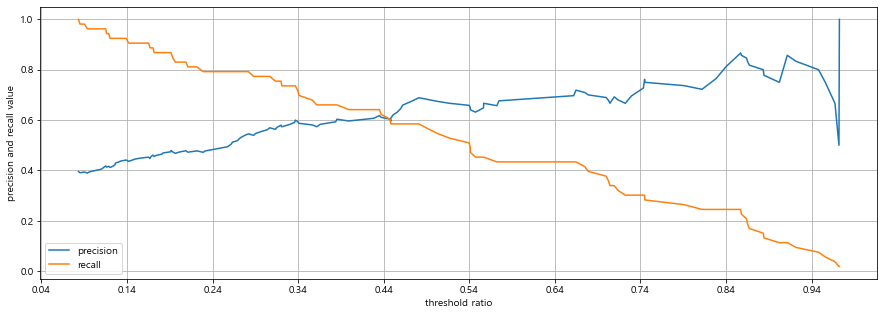

In [83]:
print('임계값 별 정밀도-재현율 시각화')
print()
print()
precision_recall_plot(y_test , logstic_model_prob) 

In [84]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [85]:
print('이상치 처리')
print('0 은 결측값이 아니기때무에 결측값으로 대체하고 평균으로 변환 - ')
feature_lst = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes[feature_lst] = diabetes[feature_lst].replace(0 , np.NaN)

이상치 처리
0 은 결측값이 아니기때무에 결측값으로 대체하고 평균으로 변환 - 


In [86]:
diabetes[feature_lst] = diabetes[feature_lst].replace(np.NaN  , diabetes[feature_lst].mean() )


In [87]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000
